In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
from sklearn.metrics import roc_curve, roc_auc_score

Load Data with all features

In [3]:
N = 1e6

all_features = "v0_ks_mass eventCounter npv ntrk_pv0 v0_ks_massErr \
pv0_x pv0_y pv0_z a0xy a0 a0z cosTheta v0_chi2 \
v0_x v0_y v0_z v0_rxy v0_rxyErr v0_px v0_py v0_pz v0_pt v0_p \
v0_ptErr v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")

path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = N)

path = "data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"
file = uproot.open(path)
mc = file['tree'].pandas.df(all_features + ['trueKs'], entrystop = N)

data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]
mc = mc.loc[(mc.v0_ks_mass > 400) & (mc.v0_ks_mass < 600)]

C:\Users\jv97\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


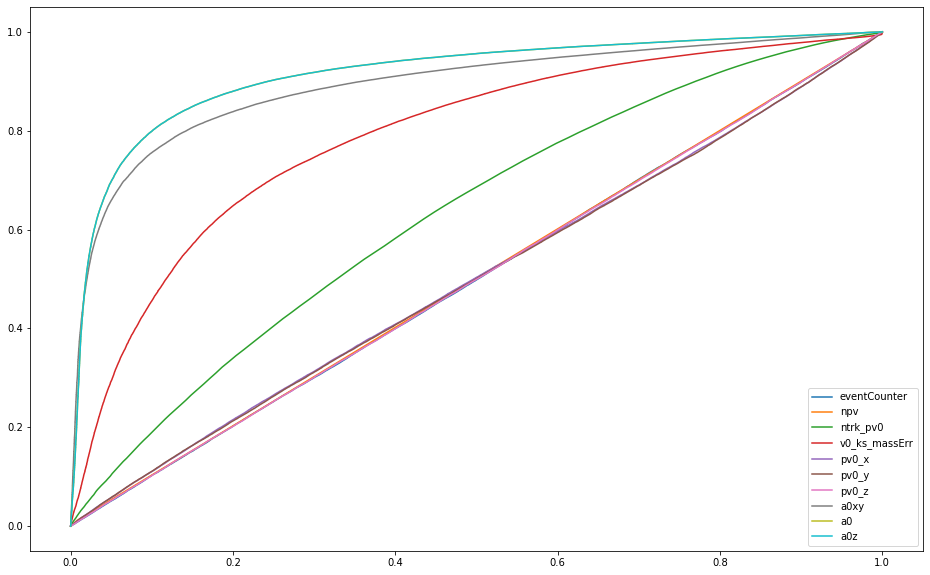

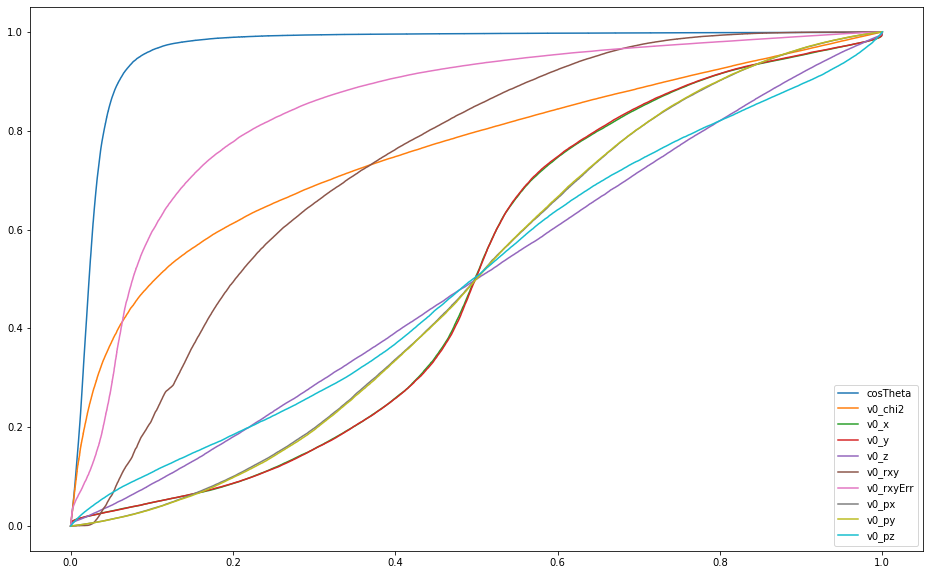

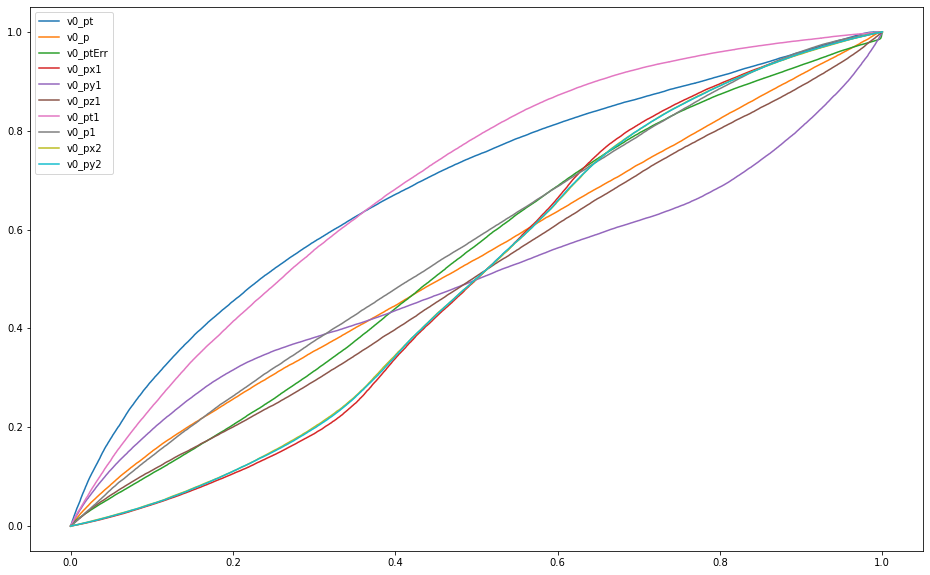

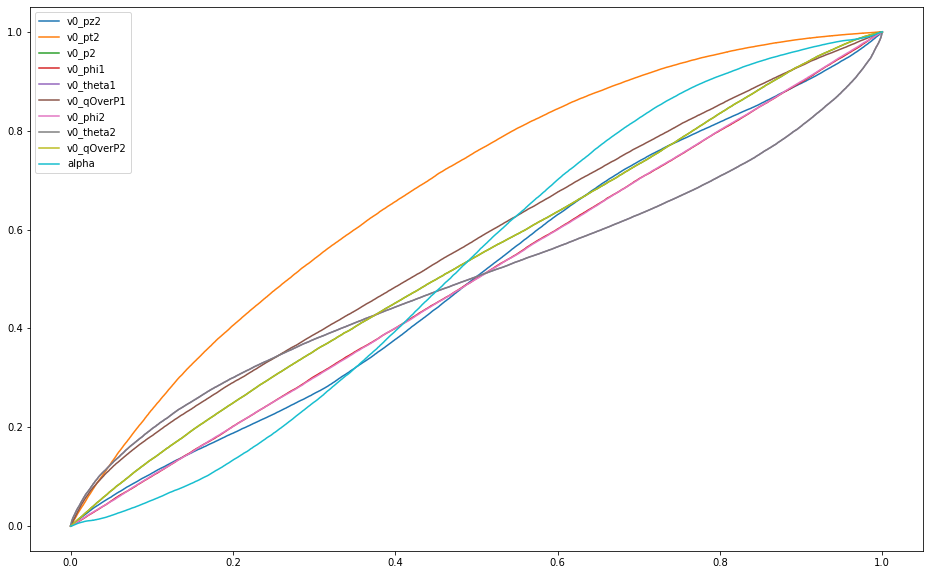

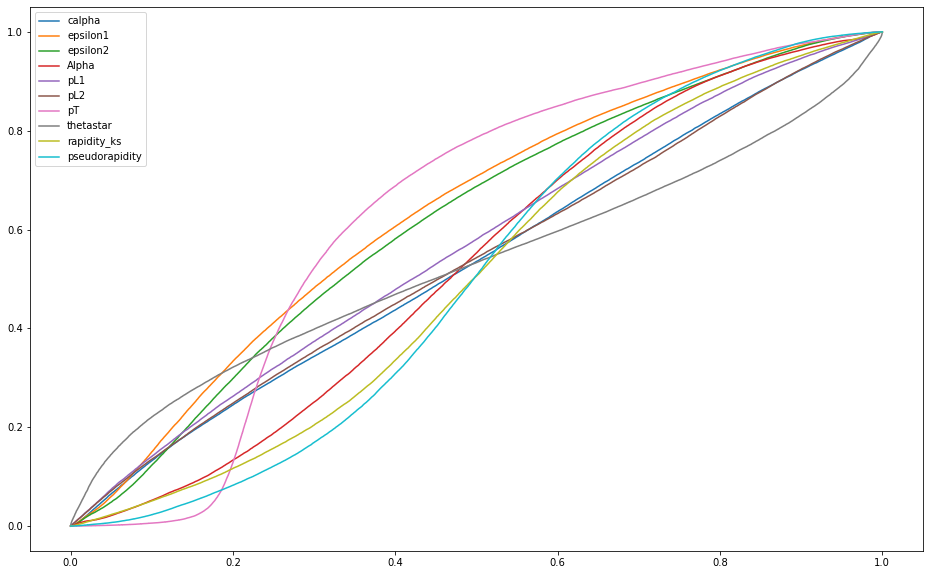

In [32]:
features = mc.columns[1:-1]
ranges = np.arange(0,len(mc.columns[1:-1])+10,10)
for i in range(len(features)//10):
    fig, ax = plt.subplots(figsize=(16,10))
    for f in features[ranges[i]:ranges[i+1]]:
        score = roc_auc_score(mc.trueKs,mc[f])
        if score > 0.5:
            fpr, tpr, threshold = roc_curve(mc.trueKs,mc[f])
        else:
            tpr, fpr, threshold = roc_curve(mc.trueKs,mc[f])
        ax.plot(fpr,tpr,label=f)
    ax.legend()

,v0_chi2,v0_ks_massErr,cosTheta,v0_rxyErr,v0_rxy,a0xy,a0z,a0
v0_chi2,1.000000,0.013946,-0.045485,-0.012034,-0.029667,0.001517,0.015900,0.015900
v0_ks_massErr,0.013946,1.000000,-0.085129,0.012048,-0.091714,0.028881,-0.036373,-0.036373
cosTheta,-0.045485,-0.085129,1.000000,-0.038261,-0.104347,-0.003767,-0.076141,-0.076141
v0_rxyErr,-0.012034,0.012048,-0.038261,1.000000,0.499247,0.571923,0.488074,0.488074
v0_rxy,-0.029667,-0.091714,-0.104347,0.499247,1.000000,0.559835,0.647237,0.647237
a0xy,0.001517,0.028881,-0.003767,0.571923,0.559835,1.000000,0.760817,0.760817
a0z,0.015900,-0.036373,-0.076141,0.488074,0.647237,0.760817,1.000000,1.000000
a0,0.015900,-0.036373,-0.076141,0.488074,0.647237,0.760817,1.000000,1.000000


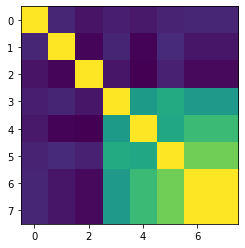

In [37]:
picked_features = "a0z a0 a0xy v0_ks_massErr cosTheta v0_rxyErr v0_chi2 v0_rxy".split(" ")

plt.imshow(data[picked_features][data[picked_features].corr().abs().sum().sort_values().index].corr())
data[picked_features][data[picked_features].corr().abs().sum().sort_values().index].corr()

In [ ]:
model1_features = "v0_chi2 v0_ks_massErr cosTheta"
model2_features = "v0_rxyErr v0_rxy a0xy a0"